In [32]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
csv_path1 = 'data/mouse_drug_data.csv'
mouse_df = pd.read_csv(csv_path1)

csv_path2 = 'data/clinicaltrial_data.csv'
clinic_df = pd.read_csv(csv_path2)

# Combine the data into a single dataset
merged_df = pd.merge(clinic_df, mouse_df, on="Mouse ID", how="left")

# Display the data table for preview

merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [33]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
new_df = merged_df.loc[:, ["Timepoint", "Drug", "Tumor Volume (mm3)"]]

# Convert to DataFrame
mean_tumor = new_df.groupby(["Drug", "Timepoint"]).mean()

mean_tumor = pd.DataFrame(mean_tumor).reset_index()

# Preview DataFrame
mean_tumor


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [34]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = new_df.groupby(["Drug", "Timepoint"]).sem()

#.sem() is the standard error of the mean 

standard_error = pd.DataFrame(standard_error).reset_index()

# Preview DataFrame
standard_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [35]:
# Minor Data Munging to Re-Format the Data Frames
new_mean_tumor = mean_tumor.pivot(index ='Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

new_standard_error = standard_error.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')

# Preview that Reformatting worked

new_mean_tumor.head()
#new_standard_error.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


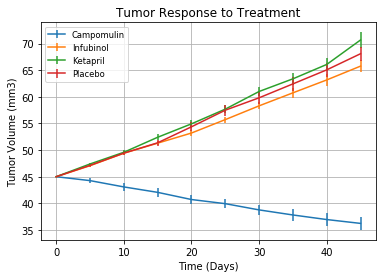

In [36]:
# Generate the Plot (with Error Bars)


# new_mean_tumor.plot(kind='scatter', x=index, y='Capomulin', color='red')

drugs =["Capomulin", "Infubinol", "Ketapril", "Placebo"]


yerr= new_standard_error 

fig1, ax1 = plt.subplots()
for drug in drugs:
    ax1.errorbar(new_mean_tumor.index, new_mean_tumor[drug], yerr[drug])


#formatting 
plt.grid(True)
plt.legend(["Campomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small")
plt.title('Tumor Response to Treatment')
plt.xlabel ("Time (Days)")
plt.ylabel ("Tumor Volume (mm3)")
#Save the figure
plt.savefig("Treatment.png")

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [37]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_data = merged_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()

# Convert to DataFrame
mean_metastatic_data = pd.DataFrame(mean_metastatic_data).reset_index()

# Preview DataFrame
mean_metastatic_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [38]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metastatic_data = merged_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()

# Convert to DataFrame
standard_error_metastatic_data = pd.DataFrame(standard_error_metastatic_data).reset_index()

# Preview DataFrame
standard_error_metastatic_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [39]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df = mean_metastatic_data.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')


standard_error_metastatic_df = standard_error_metastatic_data.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked

mean_metastatic_df.head()
# standard_error_metastatic_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


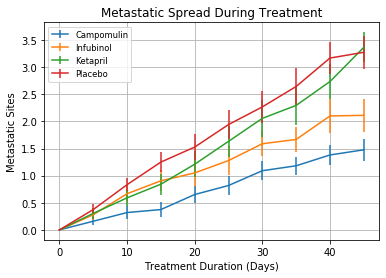

In [11]:
# Generate the Plot (with Error Bars)
drugs =["Capomulin", "Infubinol", "Ketapril", "Placebo"]


yerr = standard_error_metastatic_df 

fig2, ax2 = plt.subplots()
for drug in drugs:
    ax2.errorbar(mean_metastatic_df.index, mean_metastatic_df[drug], yerr[drug])


#formatting 
plt.grid(True)
plt.legend(["Campomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small")
plt.title('Metastatic Spread During Treatment')
plt.xlabel ("Treatment Duration (Days)")
plt.ylabel ("Metastatic Sites")
#Save the figure
plt.savefig("Metastatic.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [40]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count = pd.DataFrame(mice_count)
mice_count = mice_count.rename(columns = {"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [41]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.reset_index()
new_mice_count = mice_count.pivot(index = 'Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
new_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


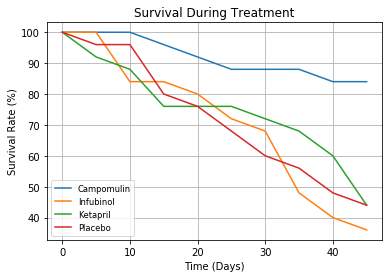

In [14]:
# Generate the Plot (Accounting for percentages)
drugs =["Capomulin", "Infubinol", "Ketapril", "Placebo"]

plt.plot(100 * new_mice_count[drugs] / 25)

#formatting 
plt.grid(True)
plt.legend(["Campomulin", "Infubinol", "Ketapril", "Placebo"], loc="best", fontsize="small")
plt.title('Survival During Treatment')
plt.xlabel ("Time (Days)")
plt.ylabel ("Survival Rate (%)")

# Save the Figure
plt.savefig("Survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes (of Tumors) for each drug
percentChangeStudyPeriod = (new_mean_tumor.iloc[9, :] - new_mean_tumor.iloc[0,:])/new_mean_tumor.iloc[0,:] * 100

# Display the data to confirm
print(percentChangeStudyPeriod)



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


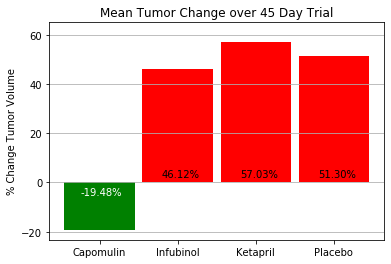

In [23]:
# Store all Relevant Percent Changes into a Tuple
percentChange = percentChangeStudyPeriod.to_frame()
percentChange = percentChange.rename(columns = {0 : "Percent Change"})
percentChange["Pass"] = (percentChange < 0)

fig4, ax4 = plt.subplots()
x = 0

for drug in drugs:
    y = percentChange.loc[drug, "Percent Change"]
    if percentChange.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Mean Tumor Change over 45 Day Trial")
plt.ylabel("% Change Tumor Volume")
plt.ylim(ymax = 65)

plt.savefig("MeanTumorChange.png")

plt.show()


# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure
# Show the Figure
fig4.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#Three Observations
#1. Mice treated with Capomulin experienced a reduction in  tumor size over the trial, with tumor volume decreasing an average of 19.48% by end of the trial.
#2. Capomulin decreases mortality in mice with tumors, slows the spread of tumor metastasis, and reduces overall tumor size.
#3. Mice treated with Ketapril experienced tumor growth over the trail period. Only 11 out of 25 (44%) mice survived the trail period after being given Ketapril. However, the drug with the lowest survival rate (of the drugs graphed) was Infubinol. Only 9 out the 25 (36%) mice given Infubinol survived the trial period. 
